# test d'un premier modèle de maching learning de recommandation de films 

## 1 - importation des bibliothèques nécessaires à la manipulation de dataframe

In [44]:
#importation des bibliothèques 
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - fonctions utilisées : implémentation des fonctions  

In [45]:
#description_dataframe
def description_dataframe(data) : 

    print("description du dataframe")
    print(f"-colonnes : ", list(data.columns), "\n")
    
    print(f"- Infos du dataframe :") 
    data.info()
    
    print("\n - Description du dataframe : ")
    print(data.describe())

    print("\n - Entetes (10 premières lignes) du dataframe : ")
    print(data.head(10))
        

In [46]:
# description du premier chunk
def description(chunk_list) : 
    for chunk in chunk_list :
        print("description du premier chunk pour tester")
        print(f"-colonnes : ", list(chunk.columns), "\n")
        
        print(f"- Infos :") 
        chunk.info()
        
        print("\n - Description : ")
        print(chunk.describe())

        print("\n - Entetes (10 premières lignes) : ")
        print(chunk.head(10))
        break

In [47]:
#valeurs uniques :
def uv (chunks_list) : 
    for i, chunk in enumerate(chunks_list):
        print(f"Chunk {i + 1} , sa taille : {chunk.shape[0]} lignes et {chunk.shape[1]} colonnes ")
        for col in chunk.columns:
            unique_count = chunk[col].nunique()
            print(f"{col}: {unique_count} valeurs uniques")
        break


In [48]:
# valuers nulles 
def null_v (chunks_list) : 
    for i, chunk in enumerate(chunks_list):
        print(f"Chunk {i + 1} , sa taille : {chunk.shape[0]} lignes et {chunk.shape[1]} colonnes ")
        for col in chunk.columns:
            valeur_null = chunk[col].isnull().sum()
            print(f"{col}: {valeur_null} valeurs nulles")
        break

In [49]:
# valuers nulles 
def null_v_df (data) : 
    print(f"la dataframe, sa taille : {data.shape[0]} lignes et {data.shape[1]} colonnes ")
    for col in data.columns:
        valeur_null = data[col].isnull().sum()
        print(f"{col}: {valeur_null} valeurs nulles")

## 3 - table tmdb CSV : importation et nettoyage de données et de la table 

In [50]:
#lecture du CSV créer
chunks_tmdb=pd.read_csv('tmdb_full.csv',
                    chunksize=500000,
                    sep=','
                    # na_values='\\N'
                    )
chunks_list_tmdb = [chunk for chunk in chunks_tmdb]

C:\Users\Ahcene\AppData\Local\Temp\ipykernel_15012\2413866732.py:7: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  chunks_list_tmdb = [chunk for chunk in chunks_tmdb]


In [51]:
description(chunks_list_tmdb)

description du premier chunk pour tester
-colonnes :  ['adult', 'backdrop_path', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'production_companies_name', 'production_companies_country'] 

- Infos :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   adult                         309572 non-null  bool   
 1   backdrop_path                 151760 non-null  object 
 2   budget                        309572 non-null  int64  
 3   genres                        309572 non-null  object 
 4   homepage                      44262 non-null   object 
 5   id                            

In [52]:
chunks_list_tmdb = [chunk.dropna() for chunk in chunks_list_tmdb]


In [53]:
null_v(chunks_list_tmdb)

Chunk 1 , sa taille : 8392 lignes et 25 colonnes 
adult: 0 valeurs nulles
backdrop_path: 0 valeurs nulles
budget: 0 valeurs nulles
genres: 0 valeurs nulles
homepage: 0 valeurs nulles
id: 0 valeurs nulles
imdb_id: 0 valeurs nulles
original_language: 0 valeurs nulles
original_title: 0 valeurs nulles
overview: 0 valeurs nulles
popularity: 0 valeurs nulles
poster_path: 0 valeurs nulles
production_countries: 0 valeurs nulles
release_date: 0 valeurs nulles
revenue: 0 valeurs nulles
runtime: 0 valeurs nulles
spoken_languages: 0 valeurs nulles
status: 0 valeurs nulles
tagline: 0 valeurs nulles
title: 0 valeurs nulles
video: 0 valeurs nulles
vote_average: 0 valeurs nulles
vote_count: 0 valeurs nulles
production_companies_name: 0 valeurs nulles
production_companies_country: 0 valeurs nulles


In [54]:
description(chunks_list_tmdb)

description du premier chunk pour tester
-colonnes :  ['adult', 'backdrop_path', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'production_companies_name', 'production_companies_country'] 

- Infos :
<class 'pandas.core.frame.DataFrame'>
Index: 8392 entries, 5 to 164389
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adult                         8392 non-null   bool   
 1   backdrop_path                 8392 non-null   object 
 2   budget                        8392 non-null   int64  
 3   genres                        8392 non-null   object 
 4   homepage                      8392 non-null   object 
 5   id                            8392 non-null 

In [55]:
data_tmdb = pd.concat(chunks_list_tmdb, ignore_index=True)
data_tmdb.head()

,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_country
0,False,/c1BaOxC8bo5ACFYkYYxL0bBWRaq.jpg,4000000,"['Crime', 'Comedy']",https://www.miramax.com/movie/four-rooms/,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,98,['en'],Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,5.758,2357,"['Miramax', 'A Band Apart']","['US', 'US']"
1,False,/2w4xG178RpB4MDAIfTkqAuSJzec.jpg,11000000,"['Adventure', 'Action', 'Science Fiction']",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,121,['en'],Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.208,18582,"['Lucasfilm Ltd.', '20th Century Fox']","['US', 'US']"
2,False,/yzqaKAhglTrkeOfuIXYYArf0WnA.jpg,94000000,"['Animation', 'Family']",http://movies.disney.com/finding-nemo,12,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",...,100,['en'],Released,There are 3.7 trillion fish in the ocean. They...,Finding Nemo,False,7.823,17625,['Pixar'],['US']
3,False,/3h1JZGDhZ8nzxdgvkxha0qBqi05.jpg,55000000,"['Comedy', 'Drama', 'Romance']",https://www.paramountmovies.com/movies/forrest...,13,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,...,142,['en'],Released,The world will never be the same once you've s...,Forrest Gump,False,8.481,24593,"['Paramount', 'The Steve Tisch Company', 'Wend...","['US', '', '']"
4,False,/dhr0q4eiRr8ltqPig32TwhPRdaD.jpg,0,"['Horror', 'Thriller', 'Mystery']",http://www.whatisannwyn.co.uk/,17,tt0411267,en,The Dark,"In an attempt to pull her family together, Adè...",...,87,"['en', 'cy']",Released,One of the living for one of the dead.,The Dark,False,5.815,232,"['Constantin Film', 'Impact Pictures', 'Isle o...","['DE', 'GB', 'GB', 'GB']"


In [56]:
data_tmdb.columns

Index(['adult', 'backdrop_path', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'production_companies_name',
       'production_companies_country'],
      dtype='object')

<Axes: >

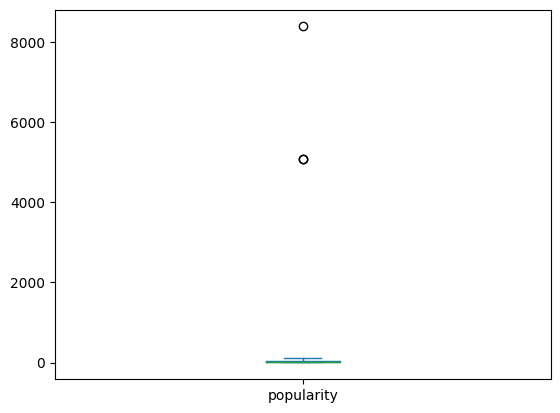

In [57]:
data_tmdb['popularity'].describe(np.arange(0,1.1,0.1)).plot(kind='box')

In [58]:
data_tmdb['popularity'].describe(np.arange(0,1.1,0.1))

count    8392.000000
mean       15.468288
std       100.600771
min         0.600000
0%          0.600000
10%         0.786200
20%         1.400000
30%         2.019600
40%         2.939400
50%         4.285000
60%         6.792400
70%        10.388400
80%        15.292400
90%        26.834500
100%     5089.969000
max      5089.969000
Name: popularity, dtype: float64

In [59]:
data_tmdb.drop(columns=['backdrop_path', 'homepage'], inplace=True)
data_tmdb=data_tmdb[data_tmdb['adult'] == False]

data_tmdb.drop(columns=['poster_path'], inplace=True)

data_tmdb['release_date'] = pd.to_datetime(data_tmdb['release_date'])

data_tmdb=data_tmdb[data_tmdb['status']=='Released']

data_tmdb=data_tmdb[data_tmdb['video'] == False]
data_tmdb.drop(columns=['tagline'], inplace=True) 
data_tmdb.drop(columns=['video', 'adult', 'status'], inplace=True) 
data_tmdb = data_tmdb[data_tmdb['release_date'].dt.year > (1980)]

seuil = data_tmdb['popularity'].quantile(0.99)  
data_tmdb = data_tmdb[data_tmdb['popularity'] <= seuil]

#### Commentaires sur le nettoyage de données :
    Suppression des colonnes : 
       - backdrop_path et homepage : non pertinentes à l'analyse,

    Suppression de films pour adultes, 
    Mettre la date de réalisation en format datetime,
    Garder que les films ayant un statu réalisé,
    Garder que les films, suppression de courts métrages : colonne 'video' est false,
    Suppression des colonnes :
        - tagline non pertinente,
        - video, adult, et status : déjà filtrer auparavant

    Garder que les films après 1980,

    Indice de popularité, comme vu avec le boxplot de l'indice de popularité, on en recense beaucoup de valeurs aberrantes (outilers), on a donc décidé de prendre la méthode .quartile(99%) => ce qui donne qu’on garde 99% des films où l’indice de popularité est le moins extrême donc, on élimine les outliers.


    Finalement : nous allons joindre ce dataset nettoyé à un autre dataset contenu des avis utilisateurs (MovieLens), afin d'appliquer une jointure et avoir une matrice utilisateur-film pour une classification KNN

    Un second nettoyage à la fin aurait lieux, une fois nous aurions la jointure

## 4 - MovieLens et avis utilisateur : jointure avec la table tmdb

In [60]:
#lecture des dataframe
data_ratings = pd.read_csv("ratings.csv")
data_links = pd.read_csv("links.csv")

In [61]:
description_dataframe(data_ratings)

description du dataframe
-colonnes :  ['userId', 'movieId', 'rating', 'timestamp'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB

 - Description du dataframe : 
             userId       movieId        rating     timestamp
count  2.000026e+07  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00  1.100918e+09
std    4.003863e+04  1.978948e+04  1.051989e+00  1.621694e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    3.439500e+04  9.020000e+02  3.000000e+00  9.667977e+08
50%    6.914100e+04  2.167000e+03  3.500000e+00  1.103556e+09
75%    1.036370e+05  4.770000e+03  4.000000e+00  1.225642e+09
max    1.384930e+05  1.312620e+05  5.000000e+00  1.427

In [62]:
description_dataframe(data_links)

description du dataframe
-colonnes :  ['movieId', 'imdbId', 'tmdbId'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB

 - Description du dataframe : 
             movieId        imdbId         tmdbId
count   27278.000000  2.727800e+04   27026.000000
mean    59855.480570  5.781860e+05   63846.683083
std     44429.314697  7.804707e+05   69862.134497
min         1.000000  5.000000e+00       2.000000
25%      6931.250000  7.741725e+04   15936.500000
50%     68068.000000  1.524350e+05   39468.500000
75%    100293.250000  9.062715e+05   82504.000000
max    131262.000000  4.530184e+06  421510.000000

 - Entetes (10 premières lignes) du dataframe : 
   movieId  imdbId   tm

In [63]:
null_v_df(data_ratings)

la dataframe, sa taille : 20000263 lignes et 4 colonnes 
userId: 0 valeurs nulles
movieId: 0 valeurs nulles
rating: 0 valeurs nulles
timestamp: 0 valeurs nulles


In [64]:
null_v_df(data_links)

la dataframe, sa taille : 27278 lignes et 3 colonnes 
movieId: 0 valeurs nulles
imdbId: 0 valeurs nulles
tmdbId: 252 valeurs nulles


In [65]:
data_links = data_links.dropna()

In [66]:
data_ml = pd.merge(data_links, data_ratings, how='inner', on='movieId')
data_ml.head()

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.0,3,4.0,944919407
1,1,114709,862.0,6,5.0,858275452
2,1,114709,862.0,8,4.0,833981871
3,1,114709,862.0,10,4.0,943497887
4,1,114709,862.0,11,4.5,1230858821


In [67]:
description_dataframe(data_ml)

description du dataframe
-colonnes :  ['movieId', 'imdbId', 'tmdbId', 'userId', 'rating', 'timestamp'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19987681 entries, 0 to 19987680
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   imdbId     int64  
 2   tmdbId     float64
 3   userId     int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(2), int64(4)
memory usage: 915.0 MB

 - Description du dataframe : 
            movieId        imdbId        tmdbId        userId        rating  \
count  1.998768e+07  1.998768e+07  1.998768e+07  1.998768e+07  1.998768e+07   
mean   9.038527e+03  1.942461e+05  9.379593e+03  6.904574e+04  3.525349e+00   
std    1.977984e+04  2.623762e+05  1.820505e+04  4.003842e+04  1.051854e+00   
min    1.000000e+00  5.000000e+00  2.000000e+00  1.000000e+00  5.000000e-01   
25%    9.030000e+02  9.472100e+04  6.640000e+02  3.439500e+04  3.000000e+00   
50%    2

In [68]:
description_dataframe(data_tmdb)

description du dataframe
-colonnes :  ['budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'production_companies_name', 'production_companies_country'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 8009 entries, 0 to 8391
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        8009 non-null   int64         
 1   genres                        8009 non-null   object        
 2   id                            8009 non-null   int64         
 3   imdb_id                       8009 non-null   object        
 4   original_language             8009 non-null   object        
 5   original_title                8009 non-null   object        
 6   overview         

In [69]:
data_ml.rename(columns={'imdbId':'imdb_id'}, inplace=True)

In [70]:
description_dataframe(data_ml)

description du dataframe
-colonnes :  ['movieId', 'imdb_id', 'tmdbId', 'userId', 'rating', 'timestamp'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19987681 entries, 0 to 19987680
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   imdb_id    int64  
 2   tmdbId     float64
 3   userId     int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(2), int64(4)
memory usage: 915.0 MB

 - Description du dataframe : 
            movieId       imdb_id        tmdbId        userId        rating  \
count  1.998768e+07  1.998768e+07  1.998768e+07  1.998768e+07  1.998768e+07   
mean   9.038527e+03  1.942461e+05  9.379593e+03  6.904574e+04  3.525349e+00   
std    1.977984e+04  2.623762e+05  1.820505e+04  4.003842e+04  1.051854e+00   
min    1.000000e+00  5.000000e+00  2.000000e+00  1.000000e+00  5.000000e-01   
25%    9.030000e+02  9.472100e+04  6.640000e+02  3.439500e+04  3.000000e+00   
50%    

In [71]:
data_tmdb['imdb_id'].head()

0    tt0113101
2    tt0266543
3    tt0109830
4    tt0411267
5    tt0325980
Name: imdb_id, dtype: object

In [72]:
data_ml['imdb_id'].head()

0    114709
1    114709
2    114709
3    114709
4    114709
Name: imdb_id, dtype: int64

In [74]:
data_ml['imdb_id'] = data_ml['imdb_id'].apply(lambda x : f"tt0{x}").astype('object') 

In [75]:
data_final = pd.merge(data_tmdb, data_ml, how='inner', on='imdb_id')
data_final.head()

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,...,title,vote_average,vote_count,production_companies_name,production_companies_country,movieId,tmdbId,userId,rating,timestamp
0,4000000,"['Crime', 'Comedy']",5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.734,['US'],1995-12-09,...,Four Rooms,5.758,2357,"['Miramax', 'A Band Apart']","['US', 'US']",18,5.0,24,5.0,994233189
1,4000000,"['Crime', 'Comedy']",5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.734,['US'],1995-12-09,...,Four Rooms,5.758,2357,"['Miramax', 'A Band Apart']","['US', 'US']",18,5.0,54,3.0,974839141
2,4000000,"['Crime', 'Comedy']",5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.734,['US'],1995-12-09,...,Four Rooms,5.758,2357,"['Miramax', 'A Band Apart']","['US', 'US']",18,5.0,69,3.0,866811536
3,4000000,"['Crime', 'Comedy']",5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.734,['US'],1995-12-09,...,Four Rooms,5.758,2357,"['Miramax', 'A Band Apart']","['US', 'US']",18,5.0,123,4.0,844996129
4,4000000,"['Crime', 'Comedy']",5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,18.734,['US'],1995-12-09,...,Four Rooms,5.758,2357,"['Miramax', 'A Band Apart']","['US', 'US']",18,5.0,148,1.0,1018966047


In [76]:
description_dataframe(data_final)

description du dataframe
-colonnes :  ['budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'production_companies_name', 'production_companies_country', 'movieId', 'tmdbId', 'userId', 'rating', 'timestamp'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711144 entries, 0 to 3711143
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   budget                        int64         
 1   genres                        object        
 2   id                            int64         
 3   imdb_id                       object        
 4   original_language             object        
 5   original_title                object        
 6   overview                      object        
 7   popularity                    

In [79]:
for col in data_final.columns : 
    print(f"valeurs uniques de la colonne {col} sont \n \
          {data_final[col].unique()}")

valeurs uniques de la colonne budget sont 
           [  4000000  94000000  55000000         0 140000000  30000000   1400000
  75000000  20000000 200000000  41000000   2000000 132000000  70000000
   2500000   2700000   1350000 150000000  93000000  79000000  14000000
 185000000  85000000 110000000  48000000  35000000  28000000  80000000
  32000000  40000000  65000000  10000000  46000000  17500000  50000000
   6400000  27000000  22000000 102000000  42000000 300000000   3000000
  90000000   6000000   7800000   1300000   4361898  12000000  63000000
  37000000   7000000  45000000  49000000  59000000 125000000   3600000
  58000000  14500000  18000000  60000000 160000000   1800000  23000000
   1000000 139000000 258000000 100000000  76000000 115000000   3300000
  92000000 130000000   8000000   4400000   6100000  54000000  19000000
 250000000  36000000  25000000  33000000  52500000 120000000  88000000
  26000000  15000000  24000000  11000000  34000000 270000000    300000
 126000000   6500000  2

In [80]:
data_final.duplicated().sum()

np.int64(0)

## 5 - Maching Learning Modèle KNN

budget


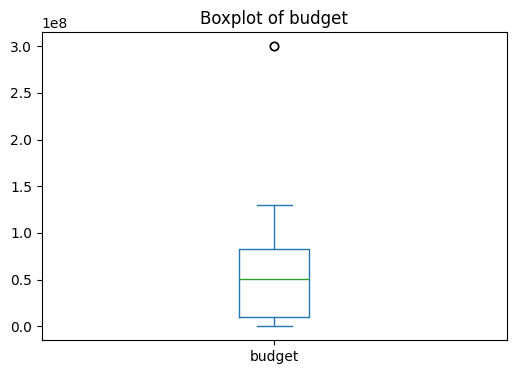

popularity


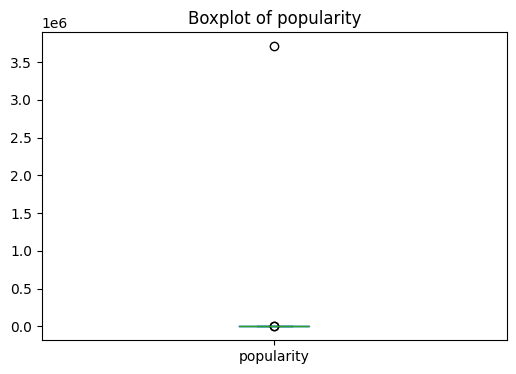

revenue


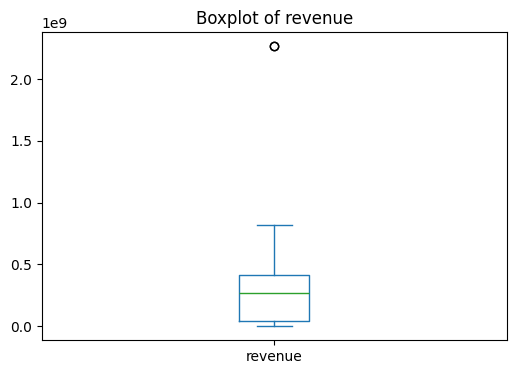

runtime


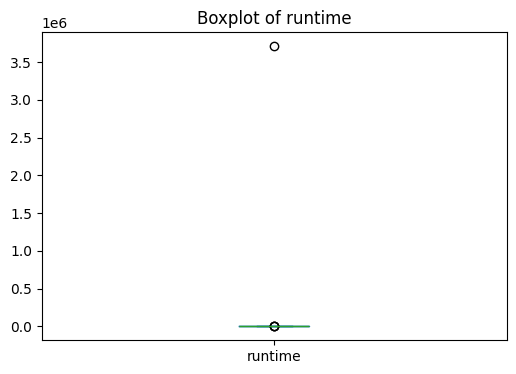

vote_average


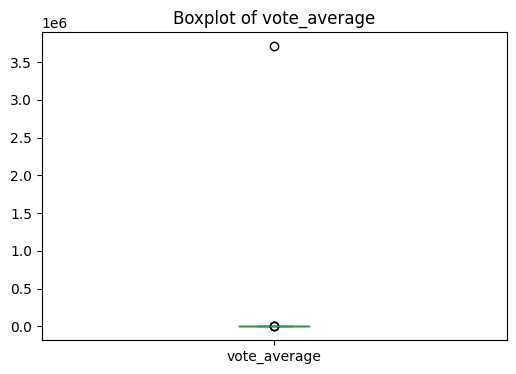

vote_count


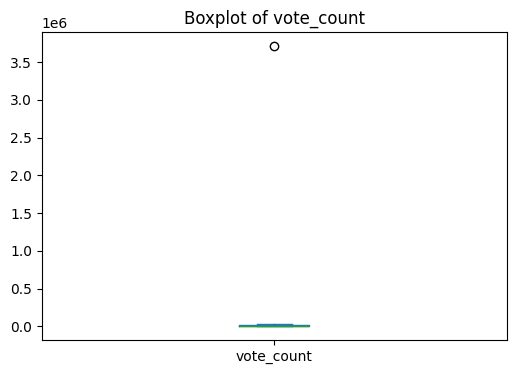

rating


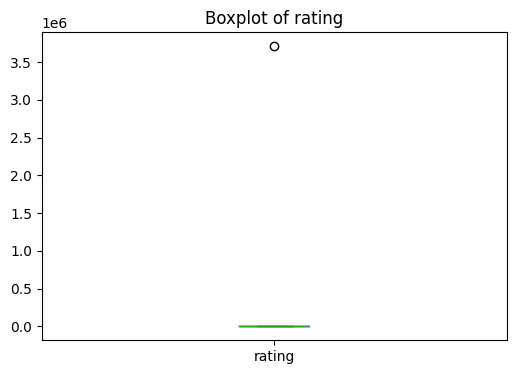

timestamp


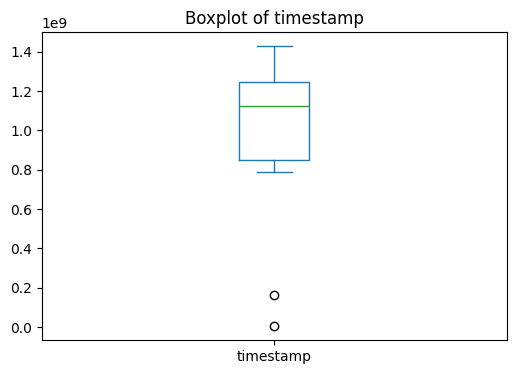

In [88]:
for col in data_final.select_dtypes(include='number').columns:
    if col not in ['id', 'movieId', 'tmdbId', 'userId']:
        print(col)
        plt.figure(figsize=(6, 4))  
        data_final[col].describe(np.arange(0, 1.1, 0.1)).plot(kind='box')
        plt.title(f'Boxplot of {col}')
        plt.show()

- ces graphique montre que beaucoup de valeurs abérantes sont présentes dans la data, 
nous allons donc simplement supprimer ces derniers afin d'avoir un dataset propre pour la partie maching learning 

In [90]:
filtered_data = data_final.copy()

for col in filtered_data.select_dtypes(include='number').columns:
    if col not in ['id', 'movieId', 'tmdbId', 'userId']:
        filtered_data = filtered_data[filtered_data[col] <= data_final[col].quantile(0.99)]


In [95]:
data_final = filtered_data

budget


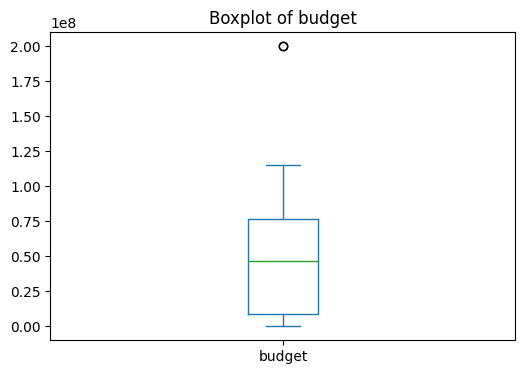

popularity


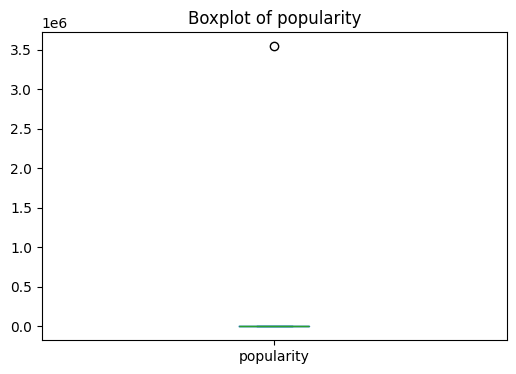

revenue


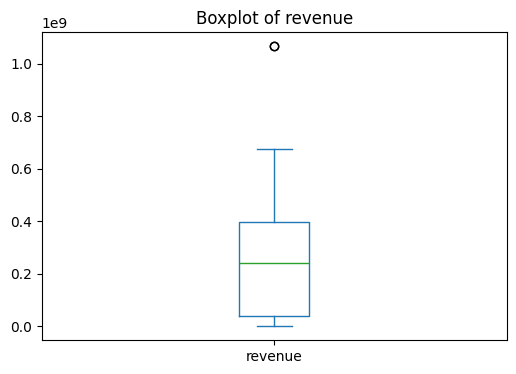

runtime


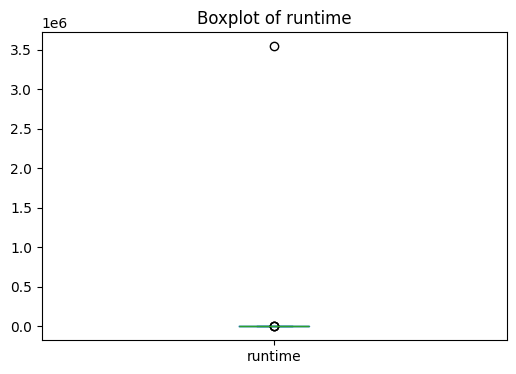

vote_average


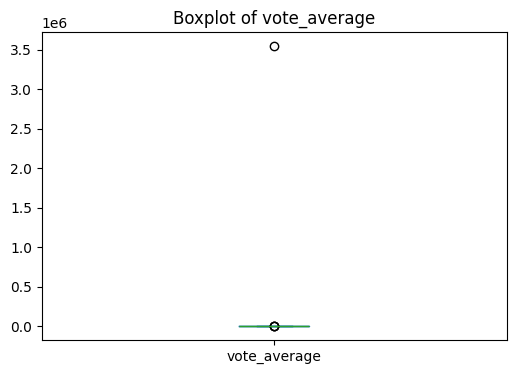

vote_count


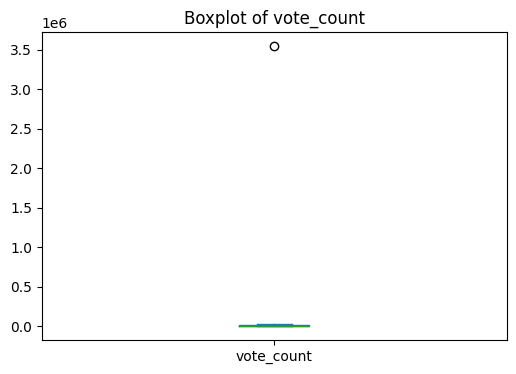

rating


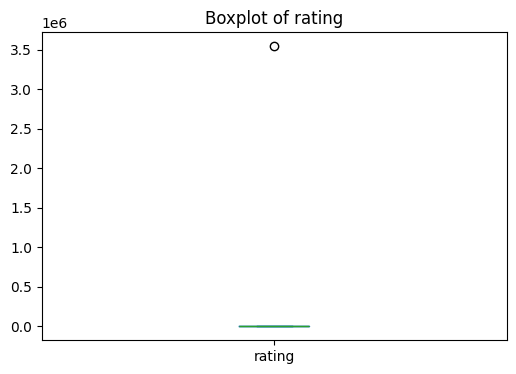

timestamp


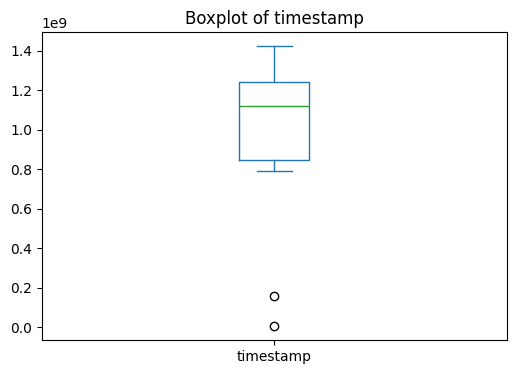

In [96]:
for col in data_final.select_dtypes(include='number').columns:
    if col not in ['id', 'movieId', 'tmdbId', 'userId']:
        print(col)
        plt.figure(figsize=(6, 4))  
        data_final[col].describe(np.arange(0, 1.1, 0.1)).plot(kind='box')
        plt.title(f'Boxplot of {col}')
        plt.show()

In [99]:
1+5

6